# Usecase Overview 

ECG is widely used by cardiologists and medical practitioners for monitoring the cardiac health. The main problem with manual analysis of ECG signals, similar to many other time-series data, lies in difficulty of detecting and categorizing different waveforms and morphologies in the signal. For a human, this task is both extensively time-consuming and prone to errors. 


We also study the ECG of patients and classify them into 5 different categories. To address the problems raised with the manual analysis of ECG signals, many studies in the literature explored using machine learning techniques to accurately detect the anomalies in the signal. We have implemented 3 different implementations for classifying the ECG signals. 


# Package Imports

In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# Data Loading

In [ ]:
df1 = pd.read_csv('data/mitbih_train.csv',header=None)
df2 = pd.read_csv('data/mitbih_test.csv',header=None)

In [ ]:
# concat the two dataframes
df=pd.concat([df1,df2],ignore_index=True,sort=False)

In [ ]:
df.shape

(109446, 188)

In [ ]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df[187].value_counts()

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64

converting the target values to integers

In [ ]:
df[187]=df[187].astype(int)

In [ ]:
df[187].value_counts()

0    90589
4     8039
2     7236
1     2779
3      803
Name: 187, dtype: int64

Checking for Null values

In [ ]:
df.isnull().sum().sum()

0

# EDA

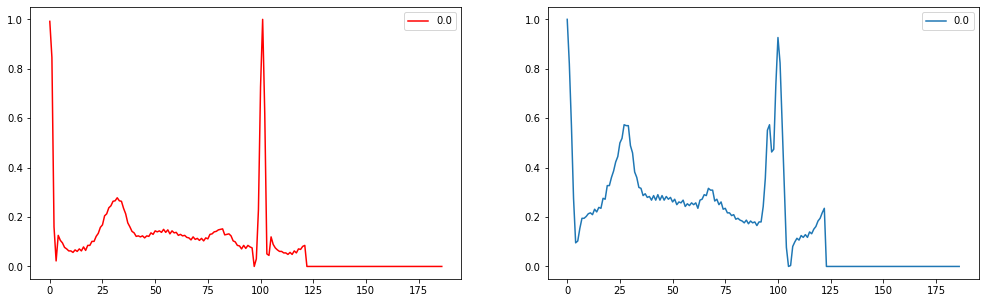

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot(121)
test_row_1=np.array(df.iloc[np.random.randint(0,len(df))])
plt.plot(test_row_1[:-1],label=test_row_1[-1],color='r')
plt.legend()

plt.subplot(122)
test_row_2=np.array(df.iloc[np.random.randint(0,len(df))])
plt.plot(test_row_2[:-1],label=test_row_2[-1])
plt.legend()

# Class Descriptions

Normal beat ('N'): 0
<br/>
Supraventricular ectopic beats ('S'): 1
<br/>
Ventricular ectopic beats ('V'): 2
<br/>
Fusion Beats ('F'): 3
<br/>
Unknown Beats ('Q'): 4

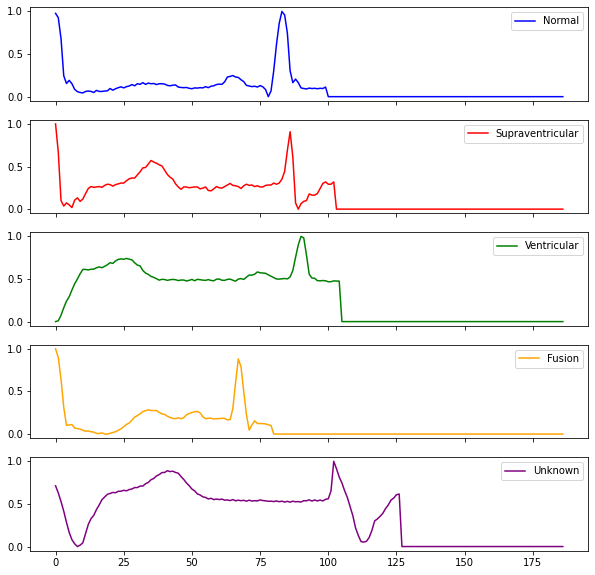

In [ ]:
# plot ECG data belonging to each class label
label = ["Normal","Supraventricular","Ventricular",
         "Fusion","Unknown"]
color = ['blue','red','green','orange','purple']
fig, ax = plt.subplots(5, 1, sharex=True, sharey=True,figsize=(10,10))
for i, row in enumerate(ax):
    row.plot((df[df[187] == i].iloc[0])[:-1], label=label[i], color=color[i])
    row.legend()

([<matplotlib.patches.Wedge at 0x23c00453520>,
 [Text(-0.9427544126347679, 0.5667575473319026, 'Normal'),
  Text(0.7244876615439377, -0.8277183266489856, 'Unknown'),
  Text(1.0073606227948213, -0.4418422519886819, 'Ventricular'),
  Text(1.0912977987617831, -0.13809096428690254, 'Supraventricular'),
  Text(1.0997078011098815, -0.02535255762382736, 'Fusion')])

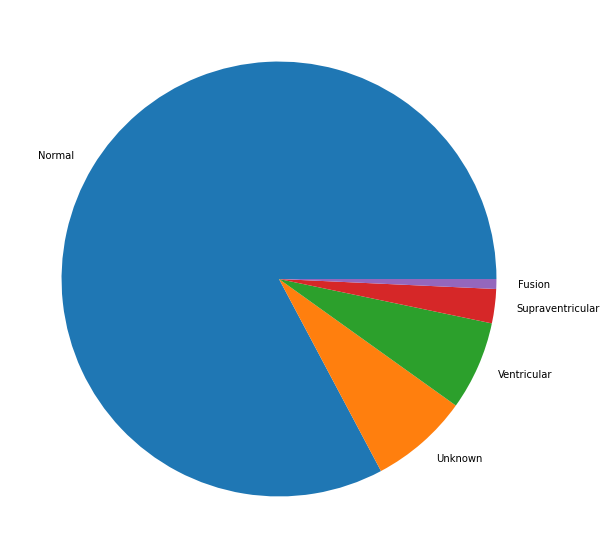

In [ ]:
# plot number of records in each category
plt.figure(figsize=(10,10))
plt.pie(df[187].value_counts(), labels = ["Normal","Unknown","Ventricular","Supraventricular","Fusion"])#,colors= ['blue','red','green','orange','purple'],autopct='%2.1f%%')

# Modeling imbalanced data with logistic Classification

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82084, 187)
(82084,)
(27362, 187)
(27362,)


# Logistic Regression

In [ ]:
log_reg=LogisticRegression()

In [ ]:
log_reg.fit(X_train,y_train)

C:\Users\pramo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=log_reg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.9129449601637307

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     22592
           1       0.84      0.39      0.54       701
           2       0.66      0.33      0.44      1789
           3       0.60      0.20      0.30       194
           4       0.96      0.87      0.91      2086

    accuracy                           0.91     27362
   macro avg       0.80      0.55      0.63     27362
weighted avg       0.90      0.91      0.90     27362



# Random Forest Classification

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.9760982384328631

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     22592
           1       0.98      0.63      0.77       701
           2       0.98      0.89      0.94      1789
           3       0.92      0.60      0.72       194
           4       0.99      0.95      0.97      2086

    accuracy                           0.98     27362
   macro avg       0.97      0.81      0.88     27362
weighted avg       0.98      0.98      0.97     27362



In [ ]:
cm_matrix_rf = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

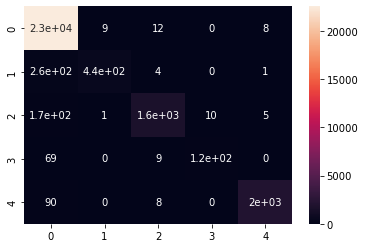

In [ ]:
sns.heatmap(cm_matrix_rf, annot=True)

# XgBoost Classification

In [ ]:
xg_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [ ]:
xg_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
y_pred=xg_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.8444192675973978

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22592
           1       0.35      0.14      0.20       701
           2       0.69      0.25      0.36      1789
           3       0.00      0.00      0.00       194
           4       0.45      0.52      0.48      2086

    accuracy                           0.84     27362
   macro avg       0.48      0.37      0.39     27362
weighted avg       0.83      0.84      0.83     27362



# Handling Imbalanced Dataset

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

0    67997
4     5953
2     5447
1     2078
3      609
Name: 187, dtype: int64

In [ ]:
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X_train,y_train)

In [ ]:
y_oversampled.value_counts()

0    67997
4    67997
2    67997
1    67997
3    67997
Name: 187, dtype: int64

# Model training after SMOTE

### Logistic Regression

In [ ]:
log_reg_resampled=LogisticRegression()

In [ ]:
log_reg_resampled.fit(X_oversampled,y_oversampled)
y_pred=log_reg_resampled.predict(X_test)
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.662341934069147

              precision    recall  f1-score   support

           0       0.97      0.63      0.76     22592
           1       0.15      0.71      0.24       701
           2       0.28      0.74      0.41      1789
           3       0.09      0.88      0.16       194
           4       0.72      0.91      0.81      2086

    accuracy                           0.66     27362
   macro avg       0.44      0.78      0.48     27362
weighted avg       0.88      0.66      0.73     27362



C:\Users\pramo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

In [ ]:
rf_resampled=RandomForestClassifier()

In [ ]:
rf_resampled.fit(X_oversampled,y_oversampled)
y_pred=rf_resampled.predict(X_test)
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.9820554053066296

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22592
           1       0.87      0.80      0.83       701
           2       0.96      0.94      0.95      1789
           3       0.84      0.79      0.82       194
           4       0.99      0.97      0.98      2086

    accuracy                           0.98     27362
   macro avg       0.93      0.90      0.91     27362
weighted avg       0.98      0.98      0.98     27362



### XGBoost

In [ ]:
xg_clf_resampled = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [ ]:
xg_clf_resampled.fit(X_oversampled,y_oversampled)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
y_pred = xg_clf_resampled.predict(X_test)
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.7565601929683503

              precision    recall  f1-score   support

           0       0.98      0.73      0.84     22592
           1       0.19      0.73      0.30       701
           2       0.42      0.81      0.55      1789
           3       0.10      0.88      0.17       194
           4       0.83      0.96      0.89      2086

    accuracy                           0.76     27362
   macro avg       0.50      0.82      0.55     27362
weighted avg       0.90      0.76      0.80     27362



# Conclusions

1. Using SMOTE oversampling, the performance of Logistic Regression declined, but that of Random Forest classifier improved, specially for the minority classes.

2. Without any oversampling also Random Forest classifier worked better

3. Xgboost comparitively didn't perform in both the cases